Fig2a-b, current clamp, action potential and its phase plot

In [1]:
from neuron import h
import numpy as np
import os.path
import sys
sys.path.append('../../libs/')

In [2]:
# load model
# works only on linux
model = '../../data/morphology/soma_axon.hoc'
dllpath = '../../data/morphology/x86_64/.libs/libnrnmech.so'
h.nrn_load_dll(dllpath)
h.load_file(model)
h.init_cell()

0.0

In [3]:
# parameters
keep_soma_Na = True

# simulation
h.tstart = 0.
h.tstop = 20.
h.dt = 0.001
rm = 30000.
st_dur1 = 2.
st_dur2 = 3.
v_init = -70

# morphology 
h.soma.L = 30.
h.soma.diam = 20.
h.soma.nseg = 6
h.soma.g_pas = 1./rm
h.soma.cm = 0.75

h.axon.L = 50.
h.axon.diam =1.
h.axon.nseg = 10
h.axon.g_pas = 1./rm
h.axon.cm = 0.75 * 0.75

# general
h.rm = rm
h.v_init = v_init
h.ra = 150 
h.c_m = 0.75
h.xn = 1 

# potassium
h.Ek = -80. # mV # Fig2: = 80; Fig4b:
h.gk = 1600.
h.gkm = 0.3
h.soma.gbar_kv = 1600/5.
h.axon.gbar_kv = 1600.

# sodium
h.Ena = 60.
h.gna = 8000.
h.gkm_soma = 0.3
if keep_soma_Na:
    h.soma.gbar_na = 0.1*8000
else:
    h.soma.gbar_na = 0.
h.axon.gbar_na = 8000.
            
# calcium (set no calcium in the model)
h.gca = 0.
h.gkca = 0.
h.gca_soma = 0.
h.gkca_soma = 0.

In [4]:
# create I-clamp stimulation
st = h.IClamp(0.5, sec = h.soma)
st.dur = 7 # ms
st.delay = 1
st.amp = 0.04

In [5]:
# record in the soma and in the axon end
vec_soma = h.Vector()
vec_soma.record(h.soma(0.5)._ref_v, sec=h.soma)
vec_axon_end = h.Vector()
vec_axon_end.record(h.axon(0.99)._ref_v, sec=h.axon)
h.run()

0.0

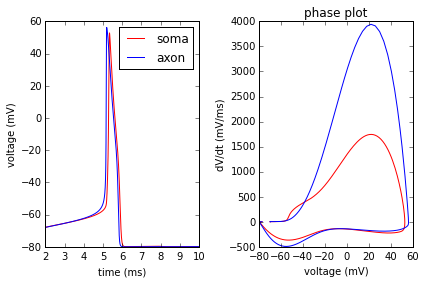

In [6]:
v_soma = np.array(vec_soma)
v_axon = np.array(vec_axon_end)
# plot the figure
import matplotlib.pylab as plt
%matplotlib inline
plt.subplot(1,2,1)
time = np.arange(len(v_soma))*h.dt

plt.plot(time, v_soma, 'r', label = 'soma')
plt.plot(time, v_axon, 'b', label = 'axon')
plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.xlim([2,10])

plt.subplot(1,2,2)
deriv_soma = np.diff(v_soma)/h.dt
deriv_axon = np.diff(v_axon)/h.dt
plt.plot(v_soma[:-1], deriv_soma, 'r', label = 'soma')
plt.plot(v_axon[:-1], deriv_axon, 'b', label = 'axon')
plt.ylabel('dV/dt (mV/ms)')
plt.xlabel('voltage (mV)')
plt.title('phase plot')
plt.tight_layout()